In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import random
import math

### 1. Сгенерируем данные в диапазоне от -50 до 50. Визуализируем выборку.

In [132]:
size = 500
x = [random.randrange(-25, 25) for i in range(size)]
epsilon = np.random.normal(0, 0.2, size)
y = [0.5 * x[i] + 1 + epsilon[i] for i in range(size)]

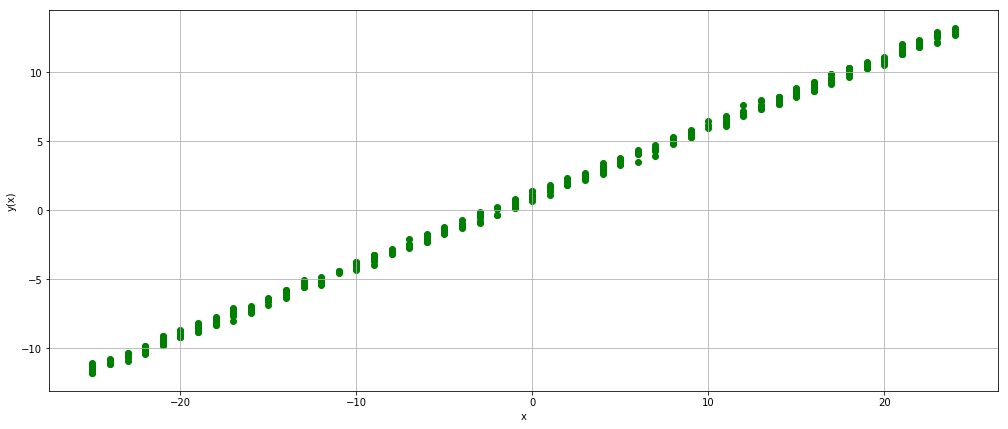

In [133]:
def visualize_sample(xx, yy):
    plt.figure(figsize=(17, 7))
    plt.scatter(xx, yy, c='g', marker='o')
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.grid()
    plt.show()
visualize_sample(x, y)

### 2. Найдем наши параметры k и b в функции y = kx + b.
Напомним, MSE = $\dfrac{1}{n} \sum\limits_{i = 1}^{n} (y - kx - b) ^ 2$

In [125]:
MSE = lambda parametres: 1 / size * sum([(y[i] - x[i] * parametres[0] - 
                                          parametres[1]) ** 2 for i in range(size)])
optimized_parametres = optimize.minimize(MSE, (0, 0))

In [126]:
optimized_parametres.x

array([ 0.49960752,  1.01225887])

#### Можно заметить, что первый параметр отлично оптимизировался, а второй параметр больше 1, так как истинная зависивмость имела $b = 1 + \varepsilon$
### Визуализируем выборку опять

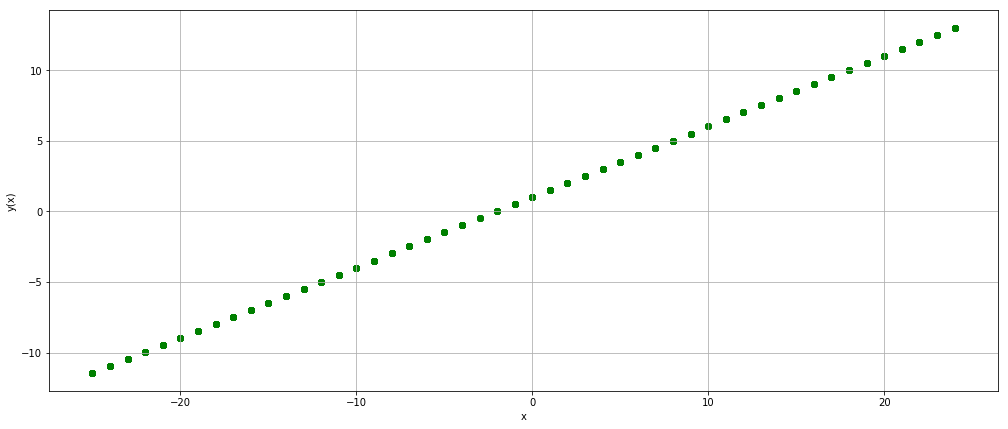

In [127]:
visualize_sample(x, [optimized_parametres.x[0] * x[i] + optimized_parametres.x[1] 
                     for i in range(size)])

#### Можно заметить, что выборки схожи, только теперь у нас для каждого значения x одно значение y. Всё это потому, что параметр b в нашей новой зависимости фиксирован, в отличие от истинной ($\varepsilon \sim N(0, 0.2)$)
### 3. Добавим элементы в выборку, минимизируем MSE, MAE. Посмотрим, что получилось.

In [134]:
newSize = 575
y = y + [-1 + np.random.normal(0, 0.2, 1) for i in range(newSize - size)]
x = x + [random.randrange(-25, 25) for i in range(newSize - size)]

In [135]:
MSE2 = lambda parametres: 1 / newSize * sum([(y[i] - x[i] * parametres[0] - 
                                              parametres[1]) ** 2 
                                             for i in range(newSize)])
optimized_parametres2 = optimize.minimize(MSE2, (0, 0))
print(optimized_parametres2.x)


MAE = lambda parametres: 1 / newSize * sum([math.fabs(y[i] - x[i] * parametres[0] - 
                                                     parametres[1])
                                            for i in range(size)])
optimized_parametres3 = optimize.minimize(MAE, (0, 0))
print(optimized_parametres3.x)

[ 0.43682051  0.82821877]
[ 0.49962558  1.00503736]


### 4. Визуализируем данные 

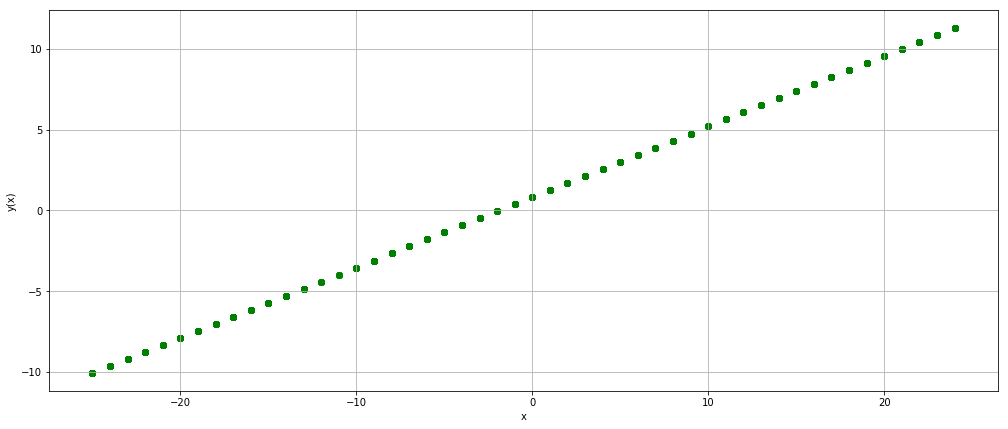

In [136]:
visualize_sample(x, [optimized_parametres2.x[0] * x[i] + optimized_parametres2.x[1] 
                     for i in range(newSize)])

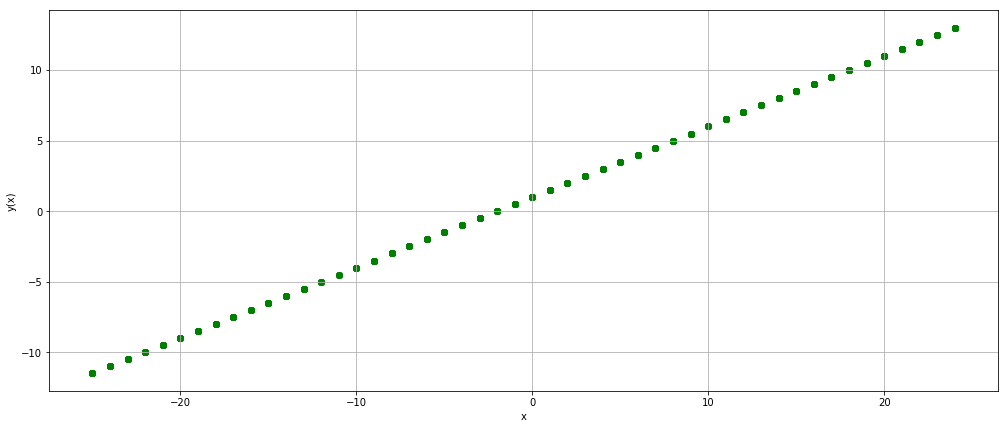

In [137]:
visualize_sample(x, [optimized_parametres3.x[0] * x[i] + optimized_parametres3.x[1] 
                     for i in range(newSize)])

### Вывод: MSE очень сильно реагирует на выборсы, потому что ошибка возводится в квадрат. Мы это увидели по полученным значениям параметра. MAE хорошо нашло параметры, потому что в этом случае мы просто суммировали ошибки по модулю.